## Create Dendrogram for Correlations between Data Representation

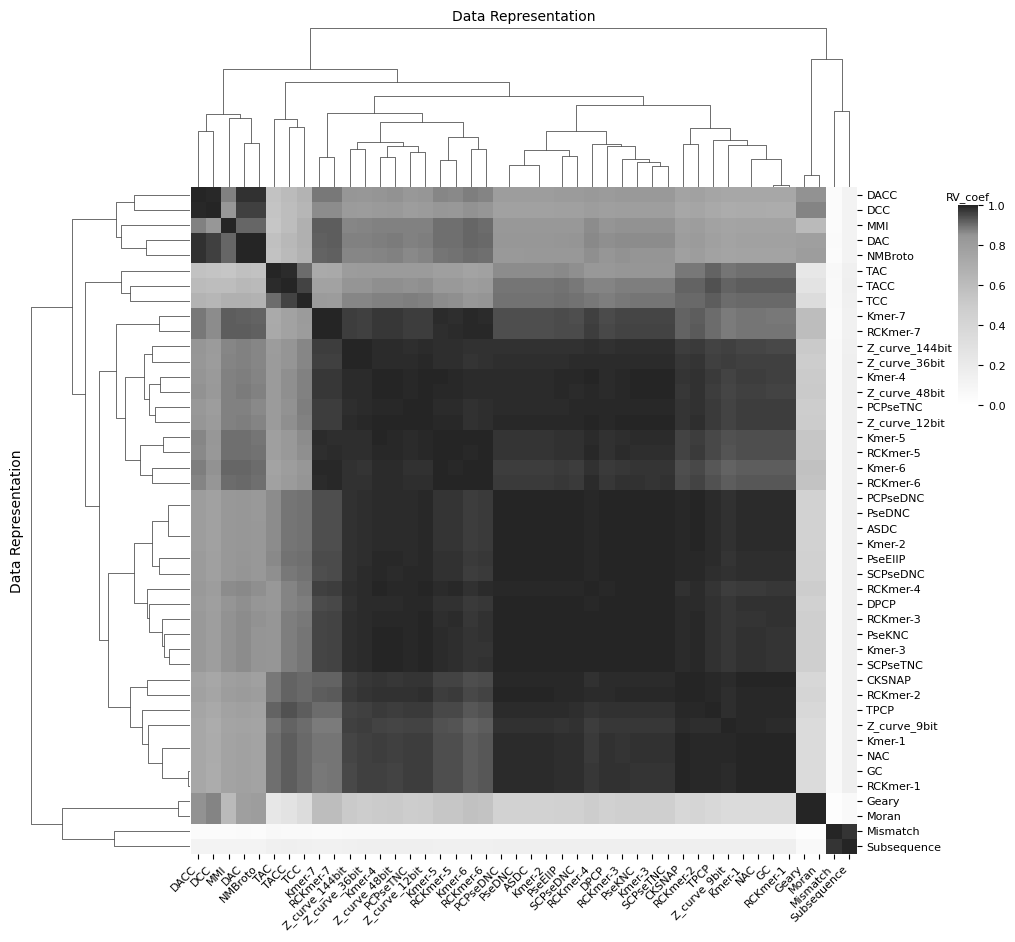

In [1]:
import pandas as pd 
import seaborn as sns 
import pickle 
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

dataset = 'benbow'

# Step 1: read the results
adjusted_rv_r = pd.read_csv('outputs/dataset_correlation/results_{}.tsv'.format(dataset), sep='\t', header=0) 
# Create the reversed DataFrame
adjusted_rv_r_reversed = adjusted_rv_r.rename(columns={'Encoding1': 'Encoding2', 'Encoding2': 'Encoding1'})

# Append the reversed DataFrame
rv_df_final = pd.concat([adjusted_rv_r, adjusted_rv_r_reversed], ignore_index=True)
df_final_pivot = rv_df_final.pivot(index='Encoding1', columns='Encoding2', values='Adjusted_RV')
rv_data = df_final_pivot.fillna(1.0)

data = rv_data 

# Step 2: Compute row and column linkage using hierarchical clustering
row_linkage = linkage(data.values, method='ward')
col_linkage = linkage(data.T.values, method='ward')

# Apply transformation to adjust branch heights
alpha = 0.25  # 0 < alpha < 1 stretches small values, compresses large ones
col_linkage[:, 2] = col_linkage[:, 2] ** alpha  # Adjust heights

# Step 3: Reorder the rows and columns based on the dendrogram
dendro_row = dendrogram(row_linkage, no_plot=True)
dendro_col = dendrogram(col_linkage, no_plot=True)

# Reorder the data based on the clustering
data_ordered = data.iloc[dendro_row['leaves'], :].iloc[:, dendro_col['leaves']]

# Define a Custom Grayscale Colormap (from dark gray to white)
custom_cmap = LinearSegmentedColormap.from_list("custom_gray", ["#f7f7f7", "#cccccc", "#969696", "#636363"])
# Define a nonlinear colormap
colors = [(0, "white"), (0.5,"#cccccc"), (0.85, "#969696"), (1,"#252525")]  # Define color transitions
custom_cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)

g = sns.clustermap(rv_data, row_linkage=col_linkage, col_linkage=col_linkage, xticklabels=True, yticklabels=True,
               cbar_pos=(0.95, 0.6, 0.02, 0.2),
               cmap=custom_cmap,
               vmin=0, vmax=1)

# Set legend (color bar) title and font size
colorbar = g.ax_cbar  # Get colorbar axis
colorbar.set_xlabel("RV_coef", fontsize=8)  # Set title and font size
colorbar.yaxis.label.set_fontsize(8)  # Ensure title font size is applied
colorbar.tick_params(labelsize=8)  # Adjust tick font size
colorbar.xaxis.set_label_position("top")

# Rotate x-axis labels
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=8)  
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8)  

# Set x-axis title on top
g.ax_heatmap.set_xlabel("Data Representation", fontsize=10, labelpad=120)
g.ax_heatmap.xaxis.set_label_position("top")

# Set y-axis title on the left
g.ax_heatmap.set_ylabel("Data Representation", fontsize=10, labelpad=120)
g.ax_heatmap.yaxis.set_label_position("left")

plt.show()

In [5]:
#check the dimensionality of each data representation
with open('dataset/encoded_data/benbow_encoded_w_gc.pkl', 'rb') as fp:
    benbow_encoded = pickle.load(fp)

data = benbow_encoded
encoded_data = [data[k] for k in data.keys() if not str(k).startswith('y') and not str(k).startswith('group')] 

data_dim = []
for k in data.keys(): 
    if not str(k).startswith('y') and not str(k).startswith('group'):
        data_dim.append({'Data Representation': k, 'Dimensionality': data[k].shape[-1]})

data_dim_df = pd.DataFrame(data_dim)
data_dim_df

,Data Representation,Dimensionality
0,NAC,4
1,CKSNAP,64
2,Subsequence,64
3,ASDC,16
4,Z_curve_9bit,9
5,Z_curve_12bit,12
6,Z_curve_36bit,36
7,Z_curve_48bit,48
8,Z_curve_144bit,144
9,PseEIIP,64
